<a href="https://colab.research.google.com/github/opethaiwoh/Data-Analysis-with-Python/blob/main/RenmoneyPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step1: Define the problem and assemble a dataset
Stated concisely our problem is the binary classification of a mushroom as edible or poisonous. We are given a dataset with 23 features including the class (edible or poisonous) of the mushroom.
From the features listed in the data information file we can create a list of column names for our dataset.

In [5]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

## import our dataset and create a Pandas DataFrame from the .data file using pd.read_csv()

In [6]:
import pandas as pd

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

In [8]:
mushrooms = pd.read_csv(url, header=None, names=column_names)

In [9]:
from sklearn.metrics import precision_score

# Step 2: Choose a measure of success
Given the nature of our problem; classifying whether or not a mushroom is poisonous or not, we will be using precision as our measure of success. Precision is the ability of the classifier not to label as edible mushrooms which are poisonous. We would much rather people discard edible mushrooms that our model classified as poisonous than eat poisonous mushrooms our classifier labeled as edible.


In [10]:
from sklearn.model_selection import train_test_split, cross_validate

# Step 3: Decide on an evaluation protocol
We will be using 10-fold cross validation to evaluate our model. 

In [13]:
pip install category_encoders

     |████████████████████████████████| 81kB 8.6MB/s 


## First lets split our data into a feature matrix (X), and a target vector (y). We will use OneHotEncoder to encode our categorical variables.

In [14]:
import category_encoders as ce
#Drop target feature
X = mushrooms.drop(columns='class') 
#Encode categorical features
X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)
 
y = mushrooms['class'].replace({'p':0, 'e':1})
print('Feature matrix size:',X.shape)
print('Target vector size:',len(y))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Feature matrix size: (8124, 117)
Target vector size: 8124


## Next we will split our data into a training set and a test set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3, stratify=y)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (5686, 117)
Training target vector size: (5686,)
Test feature matrix size: (2438, 117)
Test target vector size: (2438,)


#Step 4: Prepare the data

## We could use .dtypes(), .columns, and .shape to examine our dataset, but Pandas provides a .info function that will allow us to view all this information in one place.

In [16]:
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Checking null values and where they are in the DataFrame

In [17]:
print(mushrooms.isna().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


None… that seems a bit too good to be true.

## Since we were studious and read the dataset information file. We’re aware that all missing values are marked with a question mark. Once this is clear we can use df.replace() to convert the ? to NaNs.

In [18]:
import numpy as np
mushrooms = mushrooms.replace({'?':np.NaN})
print(mushrooms.isna().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


There we are, stalk_root has 2480 blank features, lets replace these with m for missing

In [19]:
mushrooms['stalk-root'] = mushrooms['stalk-root'].replace(np.NaN,'m')
print(mushrooms['stalk-root'].value_counts())

b    3776
m    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


# Step 5: Develop a model that does better than a baseline

## Baseline Model
Using the most common label from our dataset we will create a baseline model that we hope to beat.
First let's look at how class is distributed using df.value_counts()

In [20]:
mushrooms['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

We will use the mode of the class attribute to create our baseline prediction.

In [21]:
majority_class = y_train.mode()[0]
baseline_predictions = [majority_class] * len(y_train)

Lets see how accurate our baseline model is.

In [22]:
from sklearn.metrics import accuracy_score
majority_class_accuracy = accuracy_score(baseline_predictions,
                                         y_train)
print(majority_class_accuracy)

0.5179387970453746


## Decision Tree
We will attempt to fit a decision tree to our training data and produce an accuracy score greater than 52%.

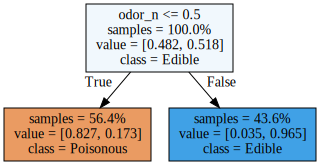

In [23]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
tree = DecisionTreeClassifier(max_depth=1)
# Fit the model
tree.fit(X_train, y_train)
# Visualize the tree
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, class_names=['Poisonous', 'Edible'], filled=True, impurity=False, proportion=True)
graphviz.Source(dot_data)

Now that we have fitted the decision tree to our data we can analyze our model by looking at the prediction probability distribution for our classifier. In simple terms, prediction probability represents how sure the model is about its classification label.
In addition to prediction probability, we will look at the precision score of our decision tree. Sklearn provides us with a simple way to see many of the relevant scores for classification models with classification_report.
We will also generate a confusion matrix using sklearn’s confusion_matrix. A confusion matrix shows the number of true and false positives and negatives.
Since we will be using these tools again we will write a function to run our model analysis for us.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
def model_analysis(model, train_X, train_y):
  model_probabilities = model.predict_proba(train_X)
  Model_Prediction_Probability = []
  for _ in range(len(train_X)):
      x = max(model_probabilities[_])
      Model_Prediction_Probability.append(x)
  plt.figure(figsize=(15,10)) 
 
  sns.distplot(Model_Prediction_Probability)
  plt.title('Best Model Prediction Probabilities')
  # Set x and y ticks
  plt.xticks(color='gray')
  #plt.xlim(.5,1)
  plt.yticks(color='gray')
  # Create axes object with plt. get current axes
  ax = plt.gca()
  # Set grid lines
  ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
  # Set facecolor
  ax.set_facecolor('white')
  # Remove box
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(color='white')
  plt.show();
  
  model_predictions = model.predict(train_X)
  # Classification Report
  print('\n\n', classification_report(train_y, model_predictions, target_names=['0-Poisonous', '1-Edible']))
  # Confusion Matrix
  con_matrix = pd.DataFrame(confusion_matrix(train_y, model_predictions), columns=['Predicted Poison', 'Predicted Edible'], index=['Actual Poison', 'Actual Edible'])
  
  plt.figure(figsize=(15,10))
  sns.heatmap(data=con_matrix, cmap='cool');
  plt.title('Model Confusion Matrix')
  plt.show();
  
  return con_matrix

## Now to apply this function to our decision tree.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


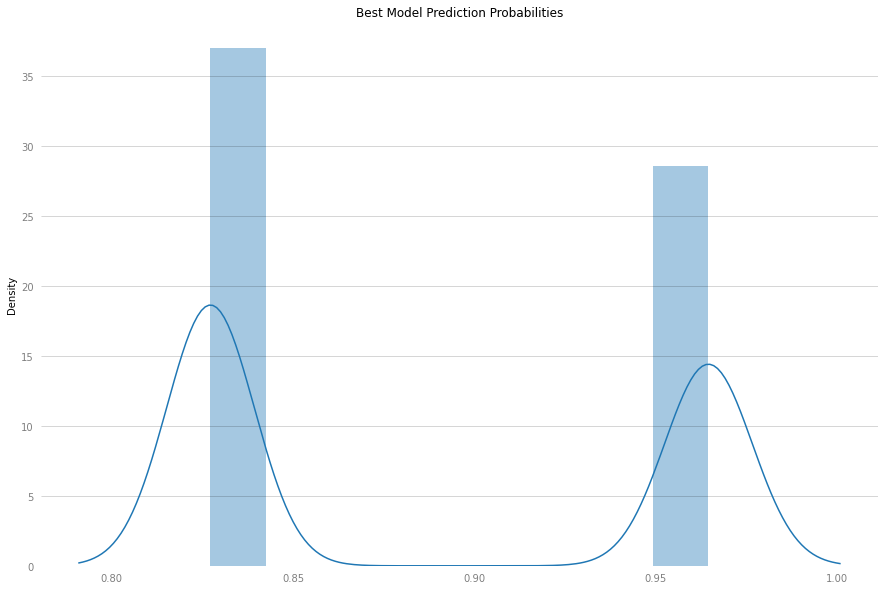



               precision    recall  f1-score   support

 0-Poisonous       0.83      0.97      0.89      2741
    1-Edible       0.96      0.81      0.88      2945

    accuracy                           0.89      5686
   macro avg       0.90      0.89      0.89      5686
weighted avg       0.90      0.89      0.89      5686



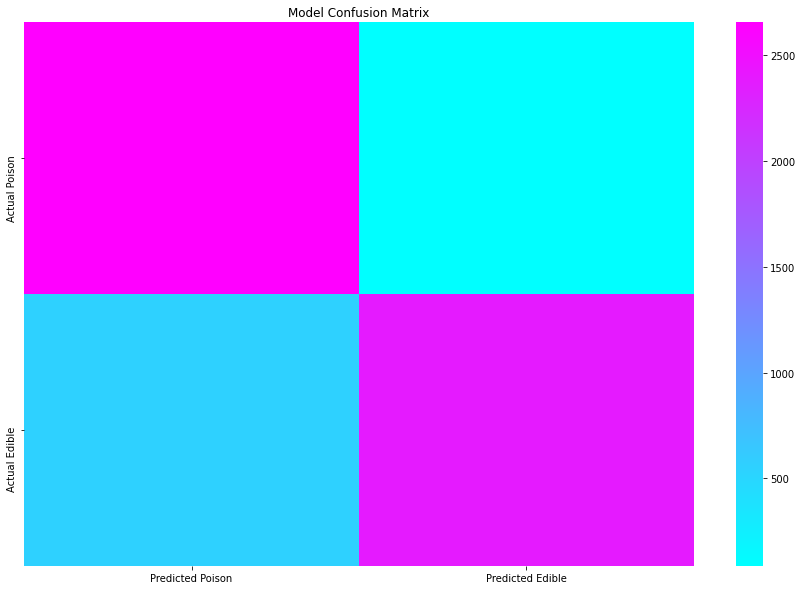

,Predicted Poison,Predicted Edible
Actual Poison,2653,88
Actual Edible,554,2391


In [25]:
model_analysis(tree, X_train, y_train)

## We will store our predictions as a tree_predictions variable for use in interpreting our models accuracy.

In [26]:
tree_predictions = tree.predict(X_train)
accuracy_score(y_train, tree_predictions)

0.887091100949701

88% accuracy isn’t bad, but let's move on to the next step in our workflow.

#Step 6: Develop a model that overfits
We will use the RandomForestClassifier for our overfitting model.

In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
cv = cross_validate(estimator = random_forest, X = X_train, y = y_train, scoring='accuracy', n_jobs=-1, cv=10, verbose=10, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


## Now we can see our random forest’s accuracy score.

In [28]:
random_forest.fit(X_test, y_test)
test_predictions = random_forest.predict(X_train)
accuracy_score(y_train, test_predictions)

0.9897995075624341

## 99% accuracy looks overfitted to me.
We can use our model_analysis function from earlier to analyze our model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


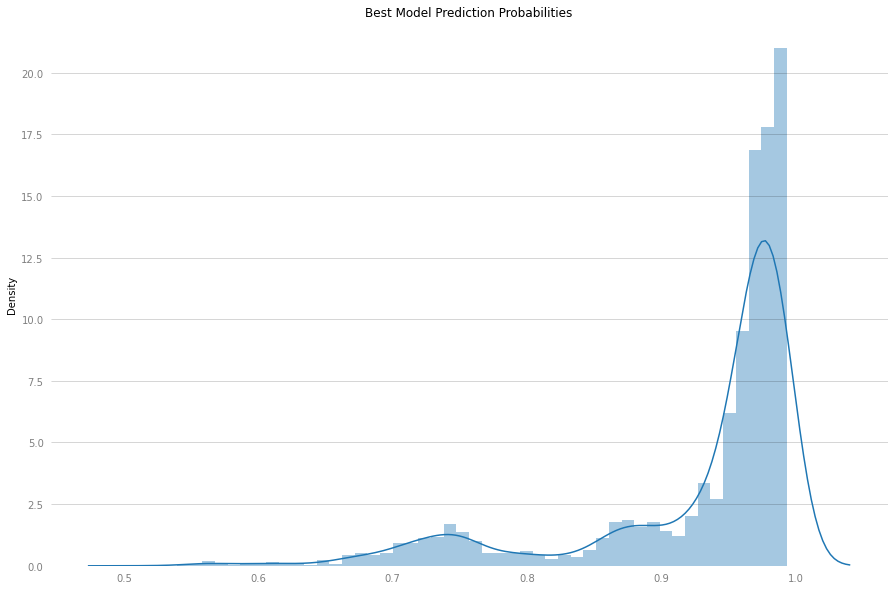



               precision    recall  f1-score   support

 0-Poisonous       1.00      0.98      0.99      2741
    1-Edible       0.98      1.00      0.99      2945

    accuracy                           0.99      5686
   macro avg       0.99      0.99      0.99      5686
weighted avg       0.99      0.99      0.99      5686



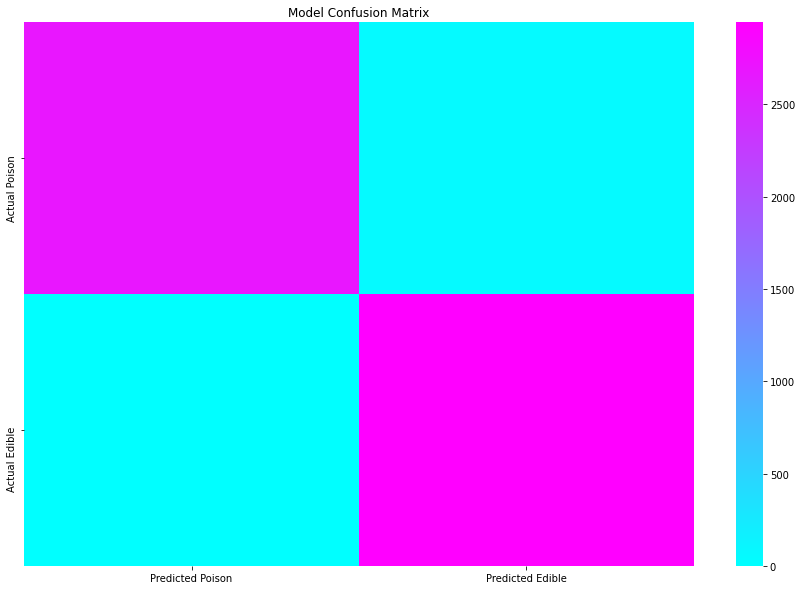

,Predicted Poison,Predicted Edible
Actual Poison,2683,58
Actual Edible,0,2945


In [29]:
model_analysis(random_forest, X_train, y_train)

#7. Regularize the model and tune its hyperparameters
Now we will tune the hyperparameters of our RandomForestClassifier and attempt to walk the line between underfitting and overfitting. We can use sklearn’s RandmoizedSearchCV to search the hyperparameters in our param_distributions dictionary.

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'max_depth':[1, 2, 3, 4, 5],
    'n_estimators': [10, 25, 50, 100, 150, 200]}
search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_distributions, n_iter=100, scoring='precision', n_jobs=-1, cv=10, verbose=10, return_train_score=True)
 
search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0786s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1065s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elap

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

## We can use search.best_estimator_ to see which model has the highest precision score

In [31]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## From the model description we can see that a RandomForestClassifier with a max_depth of 5 and 25 estimators is our optimal model. Now we can run our analysis function

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


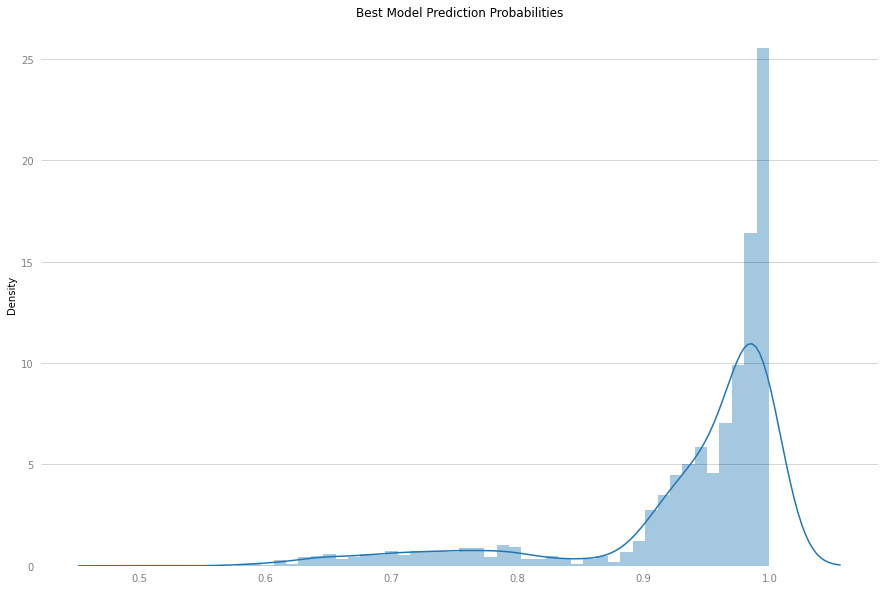



               precision    recall  f1-score   support

 0-Poisonous       1.00      0.98      0.99      1175
    1-Edible       0.98      1.00      0.99      1263

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



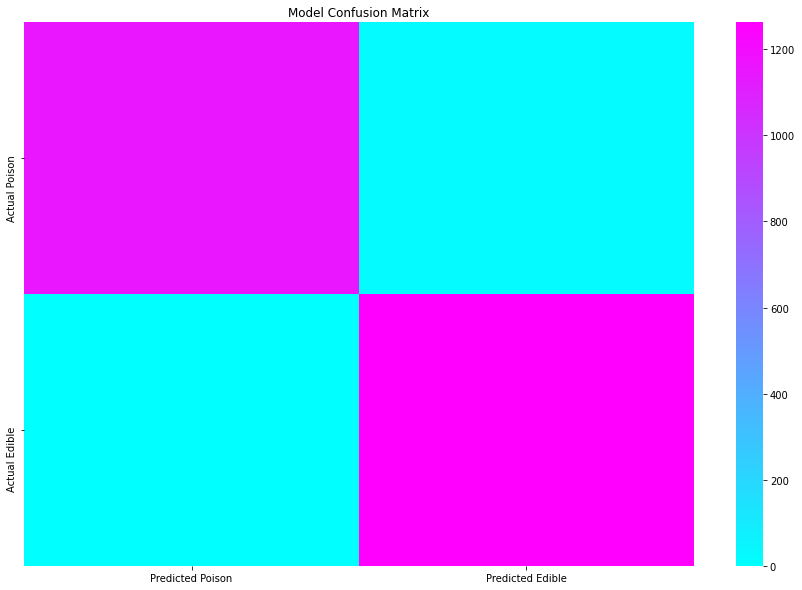

,Predicted Poison,Predicted Edible
Actual Poison,1154,21
Actual Edible,0,1263


In [32]:
model_analysis(best_model, X_test, y_test)